![headers_fraud-prev](headers_fraud-prev.jpg)


# Credit Card Fraud

[Source: Kaggle](https://www.kaggle.com/kartik2112/fraud-detection?select=fraudTrain.csv) The data was partially cleaned and adapted by DataCamp.


## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the dataset

In [2]:
-- Exploring the credit_card_fraud.csv table

SELECT 
	* 
FROM 'credit_card_fraud.csv'
LIMIT 5;

SyntaxError: invalid syntax (537279457.py, line 1)

In [ ]:
# Missing Values and Descriptive Statistics

credit_card_fraud = pd.read_csv('credit_card_fraud.csv') 

credit_card_fraud.info();
print(credit_card_fraud.describe());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

**There are no missing values in the dataset.**

<br>

**UA:**
У наборі даних немає відсутніх значень.

In [ ]:
-- Checking the Available Years of Transactions in the Dataset

SELECT 
	DISTINCT(EXTRACT(YEAR FROM trans_date_trans_time)) AS year
FROM 'credit_card_fraud.csv'
ORDER BY year;

year
0  2019
1  2020

**The dataset contains transactions for 2 years: 2019 and 2020**

<br>

**UA:** Набір даних містить транзакції за 2 роки: 2019 та 2020

## What types of purchases are most likely to be instances of fraud? 
Consider both product category and the amount of the transaction.

In [ ]:

SELECT
	category
	, EXTRACT(YEAR FROM trans_date_trans_time) as year
	, SUM(is_fraud) AS fraud_transactions
	, ROUND(AVG(amt)) AS avg_amt_by_category
	, ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY amt)) AS median_amt_by_category
	, ROUND(SUM(amt)) AS total_sum_amt_by_category
FROM 'credit_card_fraud.csv'
WHERE is_fraud = 1
GROUP BY category
		, EXTRACT(YEAR FROM trans_date_trans_time)
ORDER BY EXTRACT(YEAR FROM trans_date_trans_time)
		,fraud_transactions DESC;

category  year  ...  median_amt_by_category  total_sum_amt_by_category
0      grocery_pos  2019  ...                   311.0                    78543.0
1     shopping_net  2019  ...                   998.0                   209240.0
2         misc_net  2019  ...                   798.0                    98326.0
3     shopping_pos  2019  ...                   849.0                    87953.0
4    gas_transport  2019  ...                    10.0                      987.0
5    entertainment  2019  ...                   536.0                    20395.0
6         misc_pos  2019  ...                     9.0                     2860.0
7        kids_pets  2019  ...                    20.0                      502.0
8    personal_care  2019  ...                    21.0                      746.0
9             home  2019  ...                   243.0                     5907.0
10     grocery_net  2019  ...                    13.0                      231.0
11     food_dining  2019  ...                   117.0                     2107.0
12  health_fitness  2019  ...                    19.0                      340.0
13          travel  2019  ...                     9.0                      124.0
14     grocery_pos  2020  ...                   314.0                    57951.0
15    shopping_net  2020  ...                   991.0                   172190.0
16        misc_net  2020  ...                   802.0                    74658.0
17    shopping_pos  2020  ...                   888.0                    77790.0
18   gas_transport  2020  ...                    11.0                      948.0
19        misc_pos  2020  ...                    50.0                    10793.0
20            home  2020  ...                   258.0                     7166.0
21       kids_pets  2020  ...                    20.0                      520.0
22   personal_care  2020  ...                    22.0                      846.0
23     food_dining  2020  ...                   114.0                     2350.0
24          travel  2020  ...                     9.0                      156.0
25  health_fitness  2020  ...                    21.0                      392.0
26   entertainment  2020  ...                   537.0                     9058.0
27     grocery_net  2020  ...                    13.0                      113.0

[28 rows x 6 columns]

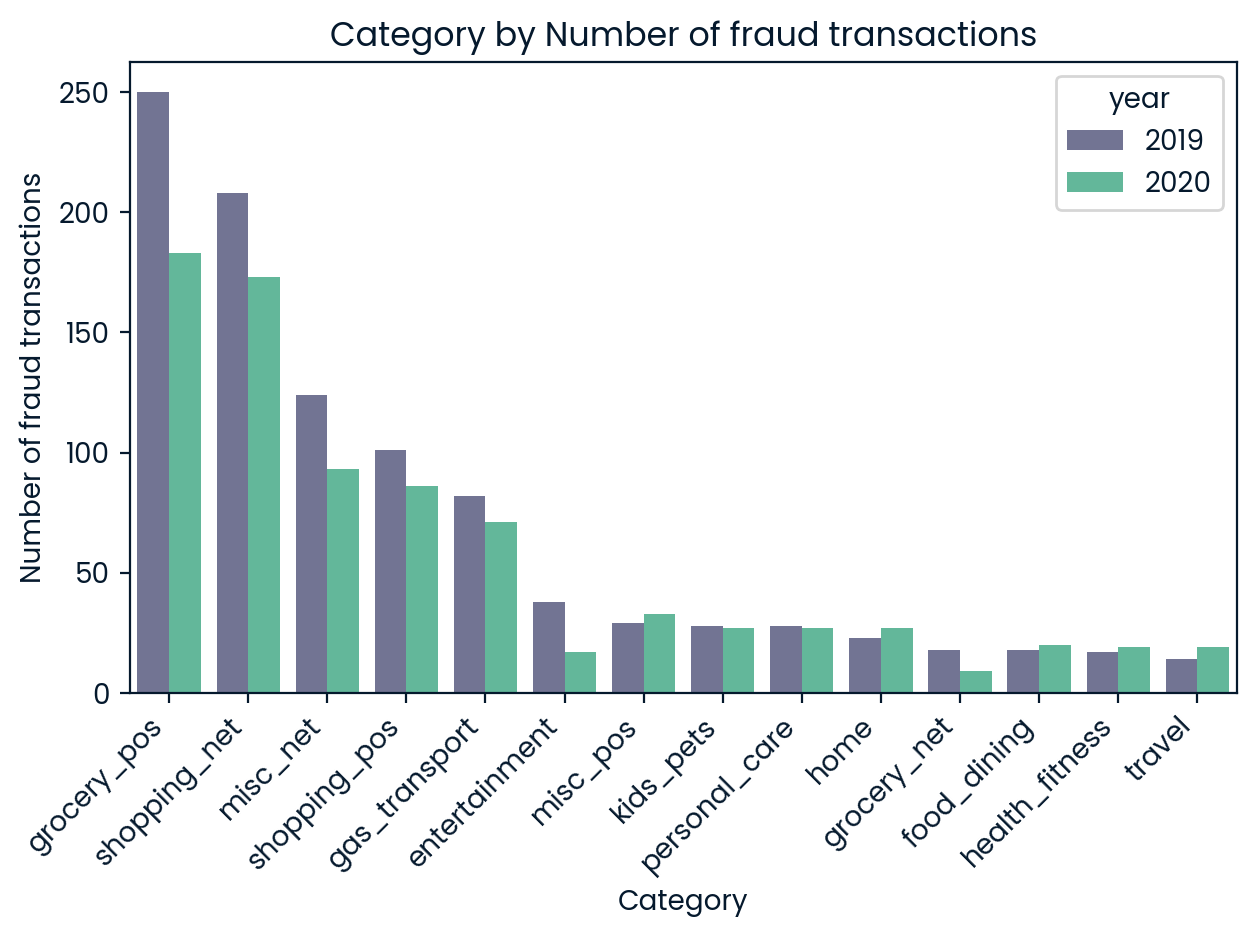

In [ ]:
# IMPORTANT! We use the previous query, available under the name year_fraud

sns.barplot(
    data=year_fraud, 
    x='category', 
    y='fraud_transactions',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    }
)

plt.title("Category by Number of fraud transactions")
plt.xlabel("Category")
plt.ylabel("Number of fraud transactions")

plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

In [ ]:
-- Fraud growth 2020_vs_2019 and amount growth 2020_vs_2019 
	
SELECT
	category
	, ROUND(SUM(CASE WHEN EXTRACT(YEAR FROM trans_date_trans_time) = 2020 THEN is_fraud END)  / SUM(CASE WHEN EXTRACT(YEAR FROM trans_date_trans_time) = 2019 THEN is_fraud END), 2) AS fraud_2020_vs_2019
	, ROUND(SUM(CASE WHEN EXTRACT(YEAR FROM trans_date_trans_time) = 2020 THEN amt END) / SUM(CASE WHEN EXTRACT(YEAR FROM trans_date_trans_time) = 2019 THEN amt END), 2)AS total_amt_by_category_2020_vs_2019
FROM 'credit_card_fraud.csv'
WHERE is_fraud = 1
GROUP BY category
ORDER BY fraud_2020_vs_2019 DESC;

category  fraud_2020_vs_2019  total_amt_by_category_2020_vs_2019
0           travel                1.36                                1.26
1             home                1.17                                1.21
2         misc_pos                1.14                                3.77
3   health_fitness                1.12                                1.15
4      food_dining                1.11                                1.12
5        kids_pets                0.96                                1.04
6    personal_care                0.96                                1.13
7    gas_transport                0.87                                0.96
8     shopping_pos                0.85                                0.88
9     shopping_net                0.83                                0.82
10        misc_net                0.75                                0.76
11     grocery_pos                0.73                                0.74
12     grocery_net                0.50                                0.49
13   entertainment                0.45                                0.44

**Based on these queries, the majority of fraudulent transactions in 2019 and 2020 occur in the top 4 categories:**

    - grocery_pos
    - shopping_net
    - misc_net
    - shopping_pos
We can see that grocery_pos ranks first in terms of the number of fraudulent transactions. At the same time, the second-largest category, shopping_net, has an average transaction amount that is more than three times higher than that of the first category.

According to the data, the number of fraudulent transactions in these four main categories decreased in 2020 compared with 2019.

<br>

**UA:** Виходячи з цих запитів, більшість шахрайських транзакцій у 2019 та 2020 роках відбуваються в 4 провідних категоріях:

- grocery_pos
- shopping_net
- misc_net
- shopping_pos

Ми бачимо, що grocery_pos посідає перше місце за кількістю шахрайських транзакцій. Водночас, друга за величиною категорія, shopping_net, має середню суму транзакції, яка більш ніж утричі вища, ніж у першій категорії.

Згідно з даними, кількість шахрайських транзакцій у цих чотирьох основних категоріях зменшилася у 2020 році порівняно з 2019 роком.

In [ ]:
-- Fraud Transaction Amount Analysis

SELECT 
    is_fraud,
    min(amt) AS min_amount,
    max(amt) AS max_amount,
    avg(amt) AS avg_amount,
    percentile_cont(0.5) WITHIN GROUP (ORDER BY amt) AS median_amount
FROM 'credit_card_fraud.csv'
GROUP BY is_fraud;


is_fraud  min_amount  max_amount  avg_amount  median_amount
0         1        1.78     1371.81  518.065460        356.435
1         0        1.00    28948.90   68.217523         46.250

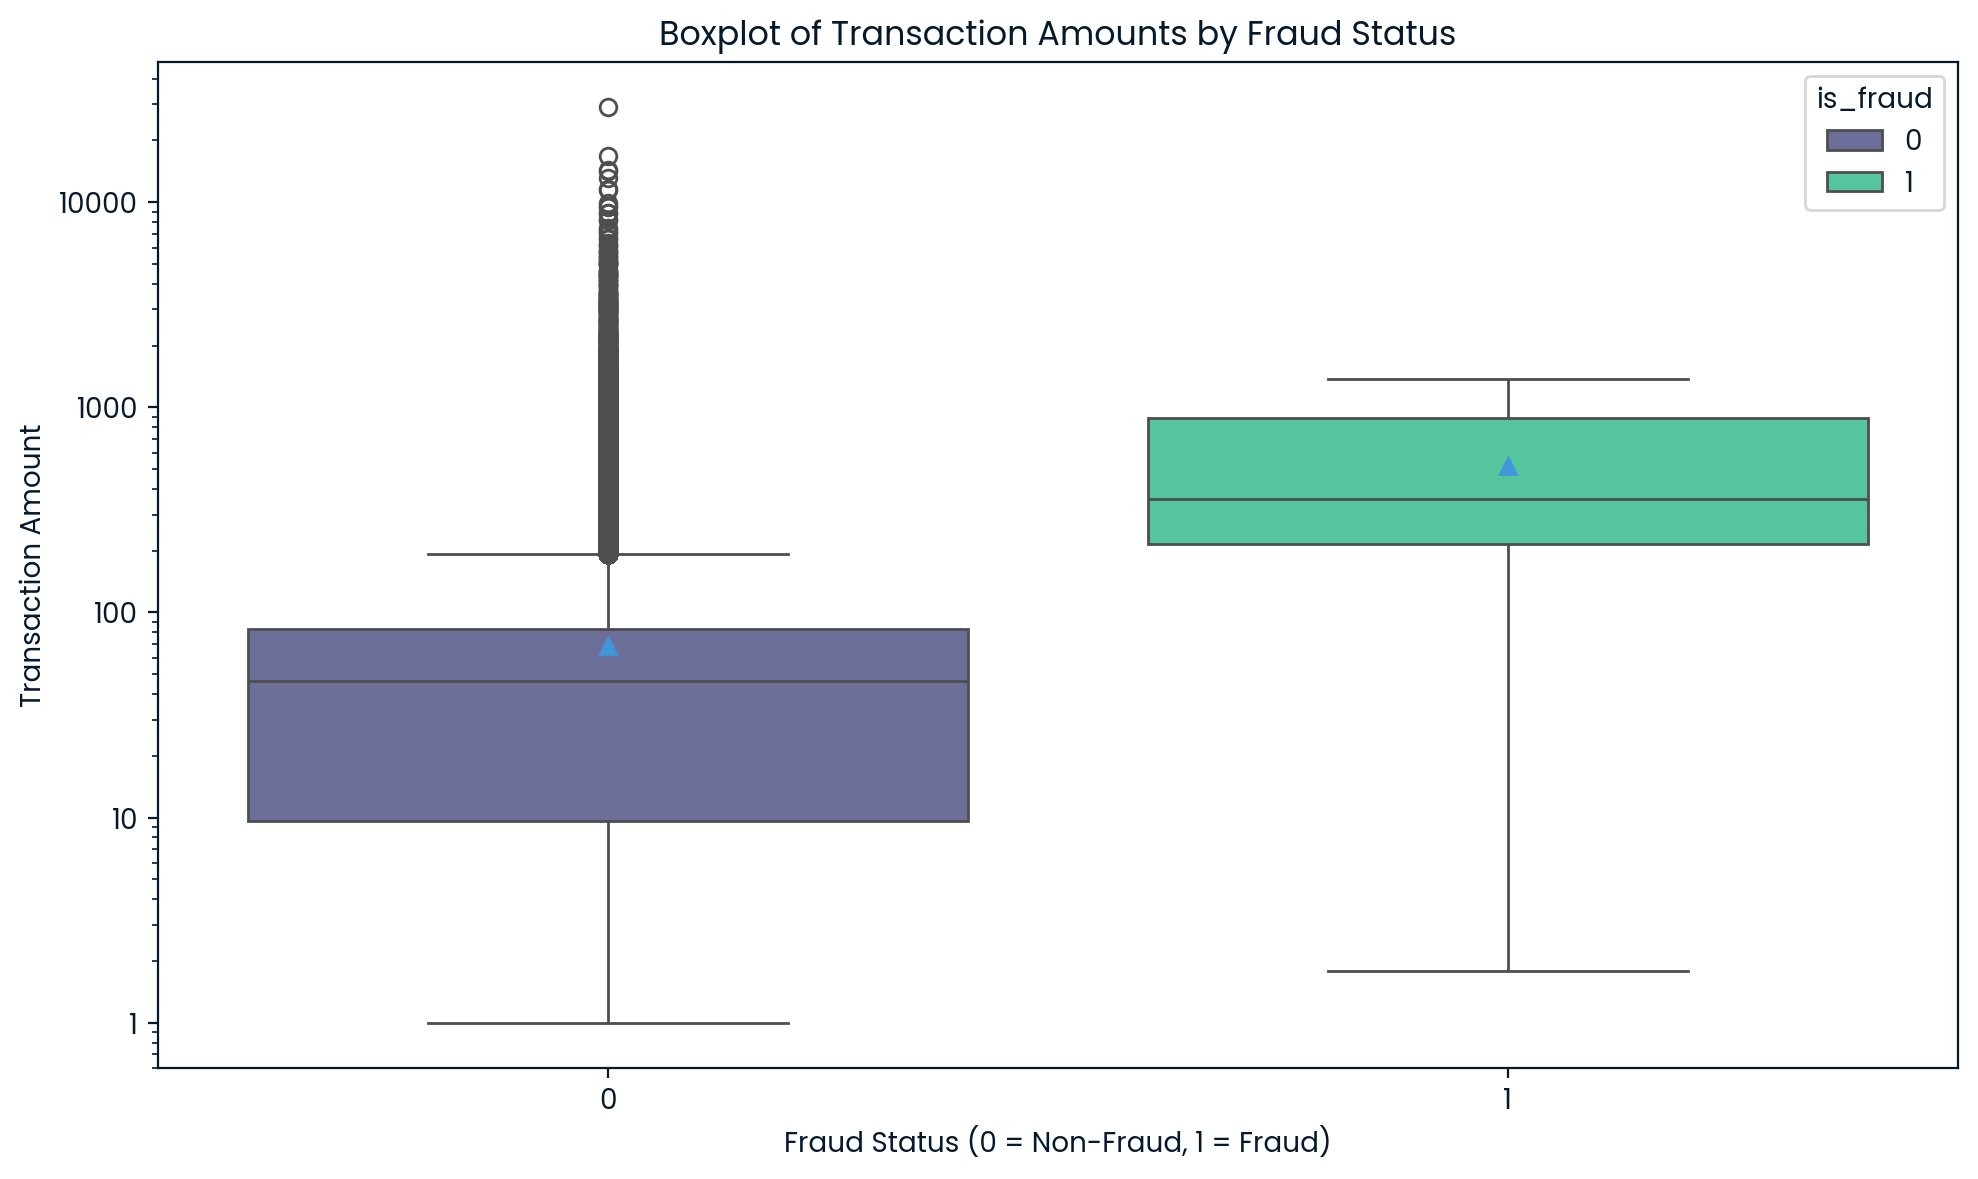

In [ ]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=(10, 6)) # graph size

sns.boxplot(
    x="is_fraud",   # category: 0 = Non-Fraud, 1 = Fraud
    y="amt",        # transaction amounts
    data=credit_card_fraud, #data
    hue='is_fraud', # color of plot
    showmeans=True  # show average
)

plt.yscale("log")  # Set the Y-axis to a logarithmic scale to better visualize wide-ranging transaction amounts
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f')) # Format the Y-axis tick labels as plain numbers (no scientific notation like 10^1, 10^2)
plt.title("Boxplot of Transaction Amounts by Fraud Status")
plt.xlabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.tight_layout() # Adjust the plot layout to make sure all labels, titles, and elements fit nicely within the figure
plt.show()


**Fraud Transaction Amount Analysis**

The analysis of transaction amount distribution reveals substantial differences between fraudulent and non-fraudulent transactions.

The median amount of fraudulent transactions is 356, which is almost 8 times higher than the median amount of all transactions ($46).

The average fraud transaction amount is 518, which is almost 7 times higher than the average transaction amount ($68). 

The maximum fraud transaction amount is approximately $1,371, illustrating a typical fraud range: transactions are large enough to be financially motivated, yet not excessively high to trigger an immediate automatic block by fraud prevention systems.

These findings indicate that fraudulent transactions in this dataset are concentrated in the $300–$1,300 range, making transaction amount an important predictor when building a fraud detection model.

<br>

**UA:** Аналіз суми шахрайських транзакцій

Аналіз розподілу суми транзакцій виявляє суттєві відмінності між шахрайськими та нешахрайськими транзакціями.

Медіанна сума шахрайських транзакцій становить 356, що майже у 8 разів перевищує медіанну суму всіх транзакцій (46 доларів США).

Середня сума шахрайської транзакції становить 518, що майже у 7 разів перевищує середню суму транзакції (68 доларів США).

Максимальна сума шахрайської транзакції становить приблизно 1371 долар США, що ілюструє типовий діапазон шахрайства: транзакції достатньо великі, щоб бути фінансово мотивованими, але не надмірно високі, щоб викликати негайне автоматичне блокування системами запобігання шахрайству.

Ці результати вказують на те, що шахрайські транзакції в цьому наборі даних зосереджені в діапазоні 1300, що робить суму транзакції важливим предиктором при побудові моделі виявлення шахрайства.

## Use a geospatial plot to visualize the fraud rates across different states.

In [ ]:
-- Fraudulent Transaction Counts Across U.S. States 

SELECT
	state
	, sum(is_fraud) as fraud_transactions
FROM 'credit_card_fraud.csv'
GROUP BY state
ORDER BY fraud_transactions DESC

state  fraud_transactions
0     CA               402.0
1     MO               262.0
2     NE               216.0
3     OR               197.0
4     WA               126.0
5     NM               121.0
6     WY               119.0
7     CO               115.0
8     AZ                64.0
9     UT                61.0
10    AK                50.0
11    ID                33.0
12    HI                16.0

In [ ]:
-- Fraud Rate by U.S. State: Fraudulent Transactions as a Proportion of Total Activity

SELECT
    state,
    COUNT(*) AS total_transactions,
    SUM(is_fraud) AS fraud_transactions,
    SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate
FROM 'credit_card_fraud.csv'
GROUP BY state
ORDER BY fraud_rate DESC;

state  total_transactions  fraud_transactions  fraud_rate
0     AK                2963                50.0    0.016875
1     OR               26408               197.0    0.007460
2     NE               34425               216.0    0.006275
3     CO               19766               115.0    0.005818
4     NM               23427               121.0    0.005165
5     CA               80495               402.0    0.004994
6     MO               54904               262.0    0.004772
7     WA               27040               126.0    0.004660
8     HI                3649                16.0    0.004385
9     WY               27776               119.0    0.004284
10    AZ               15362                64.0    0.004166
11    ID                8035                33.0    0.004107
12    UT               15357                61.0    0.003972

In [ ]:
# IMPORTANT! We use the previous query, available under the name fraud_rate 

import plotly.express as px

fraud_summary  = fraud_rate;


# Create map 
fig = px.choropleth(
    fraud_summary,
    locations='state',        # State column (must be two-letter state codes, e.g. 'CA', 'NY')
    locationmode='USA-states',
    color='fraud_rate',       # State color by fraud_rate
    hover_name='state',       # US state hint
    hover_data={
        'total_transactions': True,
        'fraud_rate': ':.2%'  # format as percentages
    },
    scope='usa',
    color_continuous_scale='Reds'
)

fig.update_layout(
    title_text='Fraud Rate by U.S. State',
)

fig.show()



**The analysis of fraudulent transactions across U.S. states** shows that the states with the highest number of fraud cases are not necessarily the states with the highest fraud rate.

States such as California, Missouri, and Nebraska report the largest absolute number of fraudulent transactions simply because they have a high overall volume of activity. However, when fraud is considered relative to the total number of transactions, a different pattern emerges.

Alaska stands out with the highest fraud rate, despite having a relatively small total number of transactions. Oregon and Nebraska also show elevated fraud rates compared to other states. This indicates that fraud is more concentrated in certain low-volume states, suggesting potential regional vulnerabilities or targeted fraudulent behavior.

Overall, these findings highlight the importance of analyzing both absolute fraud counts and fraud rates. Looking only at the number of fraudulent transactions can be misleading, while the fraud rate reveals where the risk is truly higher relative to transaction activity.

<br>

**UA:**
Аналіз шахрайських транзакцій у штатах США показує, що штати з найбільшою кількістю випадків шахрайства не обов'язково є штатами з найвищим рівнем шахрайства.

Такі штати, як Каліфорнія, Міссурі та Небраска, повідомляють про найбільшу абсолютну кількість шахрайських транзакцій просто тому, що вони мають високий загальний обсяг активності. Однак, якщо розглядати шахрайство відносно загальної кількості транзакцій, виявляється інша картина.

Аляска виділяється найвищим рівнем шахрайства, незважаючи на відносно невелику загальну кількість транзакцій. Орегон та Небраска також демонструють підвищений рівень шахрайства порівняно з іншими штатами. Це свідчить про те, що шахрайство більш сконцентроване в певних штатах з низьким обсягом, що свідчить про потенційну регіональну вразливість або цілеспрямовану шахрайську поведінку.

Загалом, ці висновки підкреслюють важливість аналізу як абсолютної кількості шахрайства, так і рівня шахрайства. Розгляд лише кількості шахрайських транзакцій може вводити в оману, тоді як рівень шахрайства показує, де ризик дійсно вищий відносно активності транзакцій.

## Are older customers significantly more likely to be victims of credit card fraud?

In [ ]:
-- Calculate the credit card holder's age:

SELECT
	category
	, amt
	, EXTRACT(YEAR FROM age(trans_date_trans_time::date, dob::date)) AS age
	, is_fraud
FROM 'credit_card_fraud.csv';

category     amt  age  is_fraud
0          grocery_pos  107.23   40         0
1        entertainment  220.11   56         0
2          grocery_pos   96.29   73         0
3         shopping_pos    7.77   51         0
4             misc_pos    6.85   51         0
...                ...     ...  ...       ...
339602            home   12.68   81         0
339603       kids_pets   13.02   62         0
339604  health_fitness   43.77   54         0
339605       kids_pets   86.88   39         0
339606          travel    7.99   55         0

[339607 rows x 4 columns]

In [ ]:
-- IMPORTANT! We use the previous query, available under the name age

SELECT
	is_fraud
	, min(age) AS min_age
	, max(age) AS max_age
	, avg(age) AS average_age
	, percentile_cont(0.5) WITHIN GROUP (ORDER BY age) AS median_age
FROM age
GROUP BY is_fraud;

is_fraud  min_age  max_age  average_age  median_age
0         1       19       91    50.241863        50.0
1         0       17       93    47.281968        45.0

In [ ]:
-- IMPORTANT! We use the previous query, available under the name age

-- Analyze the relationship between customer age and the likelihood that their transaction will be fraudulent.
	
-- The result is sorted in descending order of fraud_rate, which allows us to identify which age groups are most vulnerable to fraud.


SELECT
    CASE
        WHEN age BETWEEN 18 AND 24 THEN '18-24'
        WHEN age BETWEEN 25 AND 34 THEN '25-34'
        WHEN age BETWEEN 35 AND 44 THEN '35-44'
        WHEN age BETWEEN 45 AND 54 THEN '45-54'
        WHEN age BETWEEN 55 AND 64 THEN '55-64'
        ELSE '65+'
    END AS age_group
    , COUNT(*) AS total_transactions --the total number of transactions in this age category;
	, SUM(is_fraud) AS fraud_transactions --the number of fraudulent transactions in this group;
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_age_group --the proportion of fraudulent transactions for each age group;
FROM age
GROUP BY age_group
ORDER BY fraud_rate_by_age_group desc;

age_group  total_transactions  fraud_transactions  fraud_rate_by_age_group
0     18-24               15918               149.0                 0.009360
1     55-64               40034               325.0                 0.008118
2       65+               55883               347.0                 0.006209
3     45-54               83226               431.0                 0.005179
4     25-34               73690               289.0                 0.003922
5     35-44               70856               241.0                 0.003401

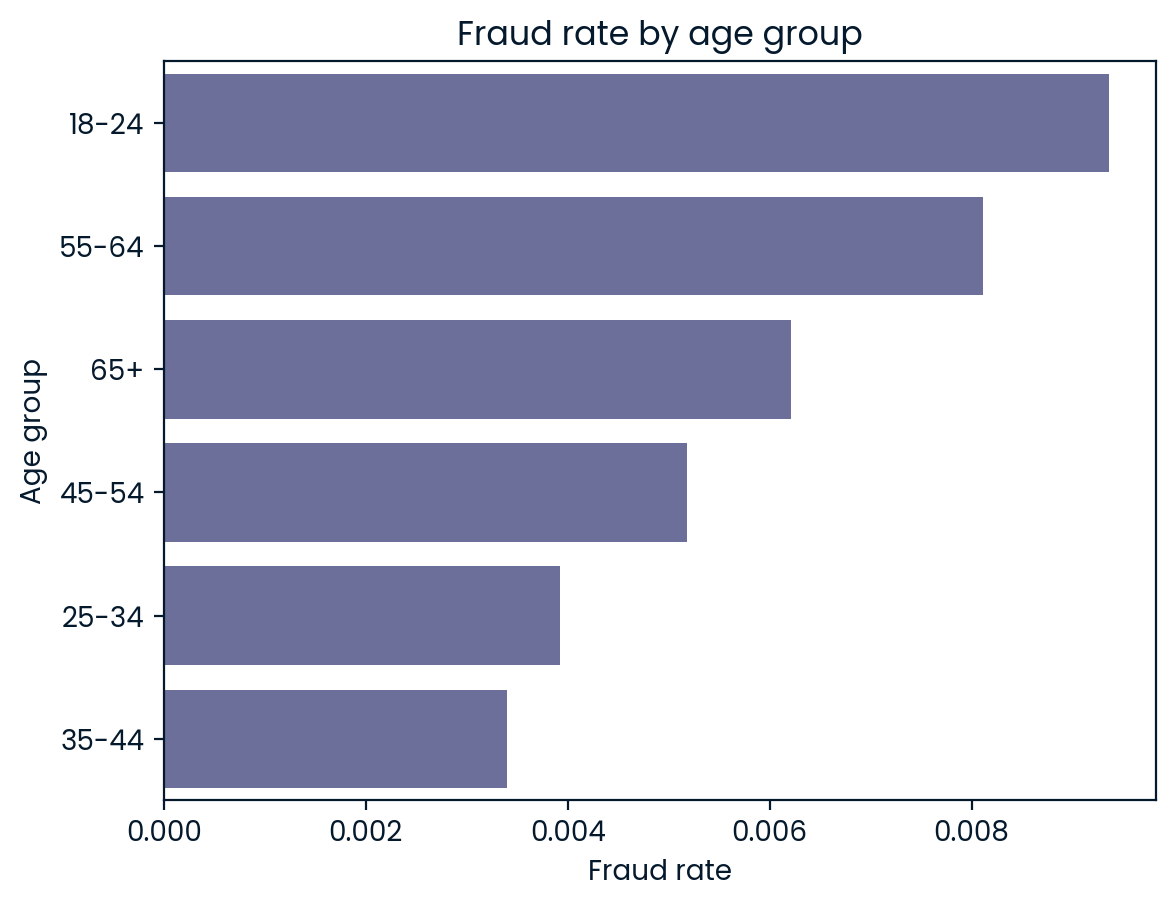

In [ ]:
sns.barplot(
    data=age_group, 
    x='fraud_rate_by_age_group', 
    y='age_group'
)

plt.title("Fraud rate by age group")
plt.xlabel("Fraud rate")
plt.ylabel("Age group")


plt.show()

**Are older customers significantly more likely to be victims of credit card fraud?**

Data does not support the claim that older customers are significantly more likely to be victims of credit card fraud.
Fraud rates remain relatively stable across age groups, with the highest rate observed among the youngest customers (18–24) rather than the oldest (65+).
Thus, age does not appear to be a strong predictor of fraud victimization in this dataset.

<br>

**UA:**
Чи значно частіше клієнти старшого віку стають жертвами шахрайства з кредитними картками?

Дані не підтверджують твердження, що клієнти старшого віку значно частіше стають жертвами шахрайства з кредитними картками. Рівень шахрайства залишається відносно стабільним у різних вікових групах, причому найвищий показник спостерігається серед наймолодших клієнтів (18–24 роки), а не серед найстарших (65+ років). Таким чином, вік, здається, не є сильним предиктором жертв шахрайства в цьому наборі даних.

## Fraud rate trend by years 2019-2020

In [ ]:
-- fraud_trend_by_year

SELECT
	CONCAT(EXTRACT(year FROM trans_date_trans_time), '-', printf('%02d', EXTRACT(month FROM trans_date_trans_time))) AS year_month
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_month
FROM 'credit_card_fraud.csv'
GROUP BY year_month
ORDER BY year_month;

year_month  total_transactions  fraud_transactions  fraud_rate_by_month
0     2019-01                9694                99.0             0.010213
1     2019-02                9084                88.0             0.009687
2     2019-03               13098               130.0             0.009925
3     2019-04               12495                53.0             0.004242
4     2019-05               13412                86.0             0.006412
5     2019-06               15773                23.0             0.001458
6     2019-07               15779                65.0             0.004119
7     2019-08               16169                82.0             0.005071
8     2019-09               13147               128.0             0.009736
9     2019-10               12528                74.0             0.005907
10    2019-11               12925                46.0             0.003559
11    2019-12               25935               104.0             0.004010
12    2020-01                9437                42.0             0.004451
13    2020-02                8733                81.0             0.009275
14    2020-03               13329                90.0             0.006752
15    2020-04               12090                67.0             0.005542
16    2020-05               13494                81.0             0.006003
17    2020-06               16046                69.0             0.004300
18    2020-07               15849                60.0             0.003786
19    2020-08               16240                74.0             0.004557
20    2020-09               12793                69.0             0.005394
21    2020-10               12599                76.0             0.006032
22    2020-11               13247                37.0             0.002793
23    2020-12               25711                58.0             0.002256

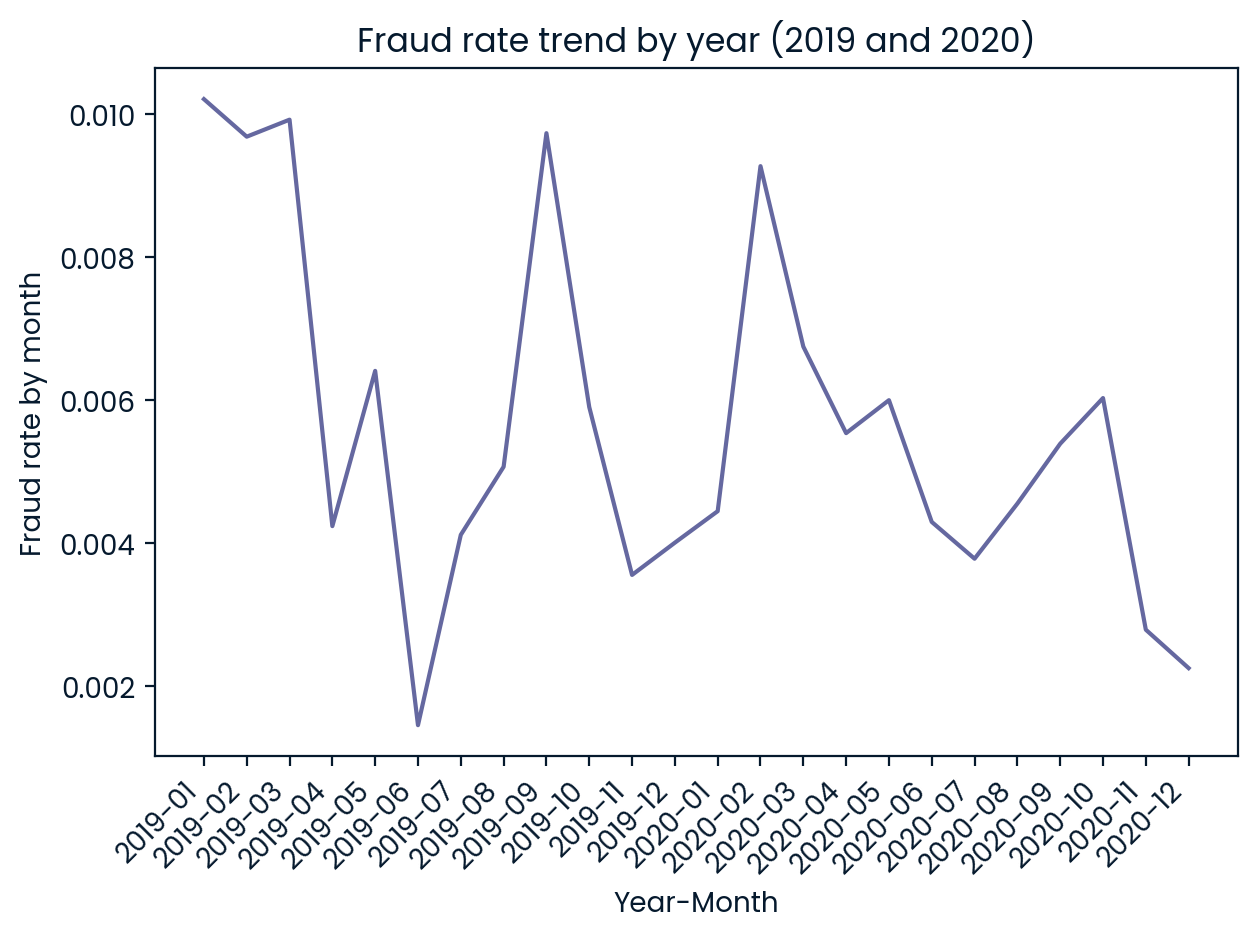

In [ ]:
# Fraud rate trend by year (2019 and 2020)

sns.lineplot(
    data=fraud_trend_by_year,
    x='year_month',
    y='fraud_rate_by_month',
)

plt.title("Fraud rate trend by year (2019 and 2020)")
plt.xlabel("Year-Month")
plt.ylabel("Fraud rate by month")

plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()


## Fraud by month

In [ ]:
--By month 

SELECT
	EXTRACT(year from trans_date_trans_time) as year
	, EXTRACT(month from trans_date_trans_time) as month
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_month
FROM 'credit_card_fraud.csv'
GROUP BY  year, month
ORDER BY year, fraud_rate_by_month DESC;

year  month  total_transactions  fraud_transactions  fraud_rate_by_month
0   2019      1                9694                99.0             0.010213
1   2019      3               13098               130.0             0.009925
2   2019      9               13147               128.0             0.009736
3   2019      2                9084                88.0             0.009687
4   2019      5               13412                86.0             0.006412
5   2019     10               12528                74.0             0.005907
6   2019      8               16169                82.0             0.005071
7   2019      4               12495                53.0             0.004242
8   2019      7               15779                65.0             0.004119
9   2019     12               25935               104.0             0.004010
10  2019     11               12925                46.0             0.003559
11  2019      6               15773                23.0             0.001458
12  2020      2                8733                81.0             0.009275
13  2020      3               13329                90.0             0.006752
14  2020     10               12599                76.0             0.006032
15  2020      5               13494                81.0             0.006003
16  2020      4               12090                67.0             0.005542
17  2020      9               12793                69.0             0.005394
18  2020      8               16240                74.0             0.004557
19  2020      1                9437                42.0             0.004451
20  2020      6               16046                69.0             0.004300
21  2020      7               15849                60.0             0.003786
22  2020     11               13247                37.0             0.002793
23  2020     12               25711                58.0             0.002256

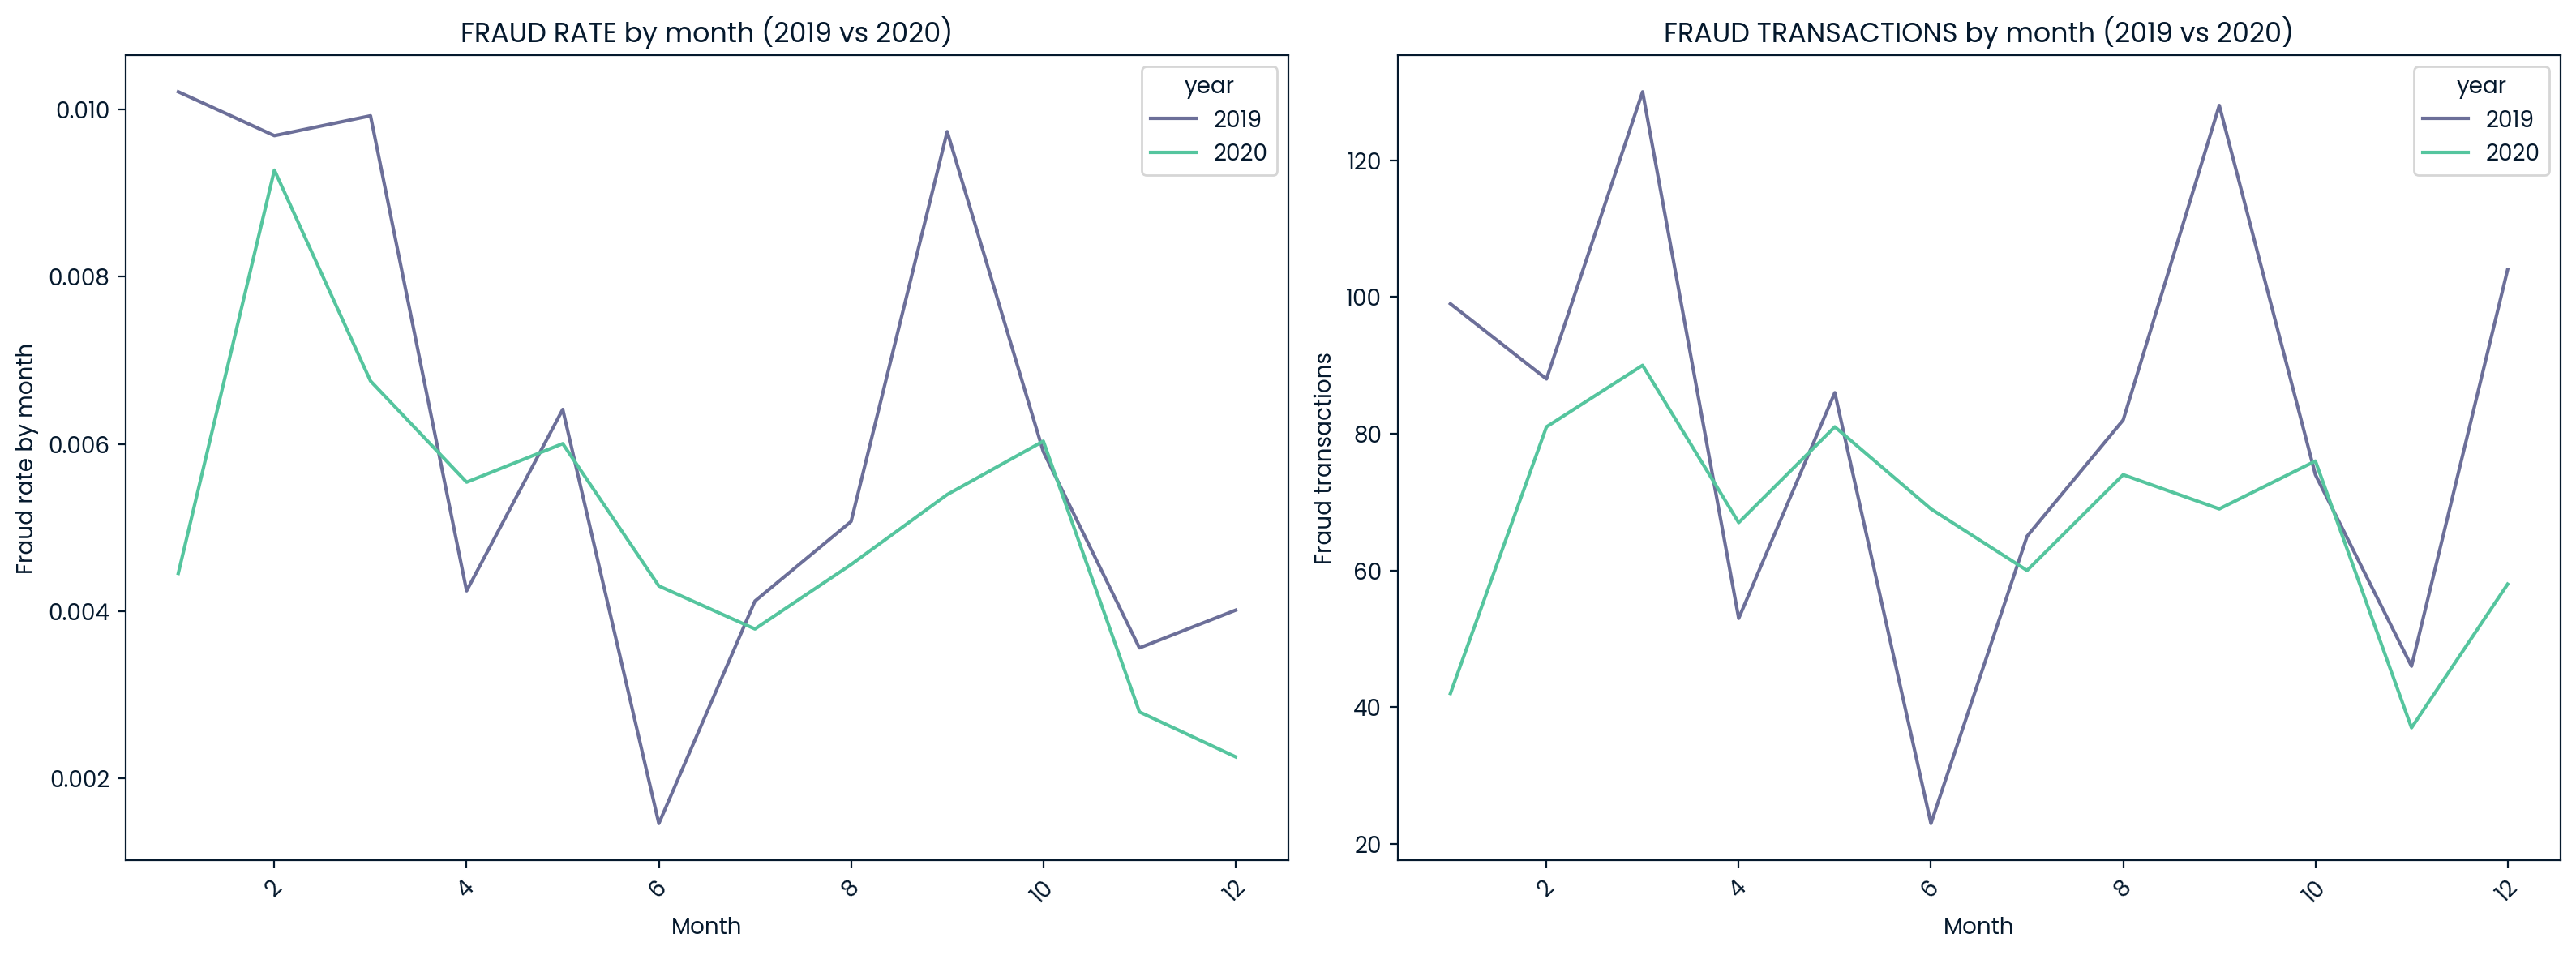

In [ ]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 16 width, 6 height

# -------------------------------
# Plot 1: Fraud rate by month
sns.lineplot(
    data=fraud_by_month,
    x='month',
    y='fraud_rate_by_month',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    },
    ax=axes[0]  # first subplot
)
axes[0].set_title("FRAUD RATE by month (2019 vs 2020)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Fraud rate by month")
axes[0].tick_params(axis='x', rotation=45)  # rotate the signature

# -------------------------------
# Plot 2: Fraud transactions by day of week
sns.lineplot(
    data=fraud_by_month,
    x='month',
    y='fraud_transactions',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    },
    ax=axes[1]  # second subplot
)
axes[1].set_title("FRAUD TRANSACTIONS by month (2019 vs 2020)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Fraud transactions")
axes[1].tick_params(axis='x', rotation=45)  # rotate the signature

# -------------------------------
plt.tight_layout()  # the plots do not overlap
plt.show()


**Key Insights**

Fraud rate in 2020 is lower and more stable than in 2019, especially in the second half of the year.

2019 shows high volatility, with sharp spikes and drops in both fraud rate and fraud transaction volume.

Fraud transaction volume in 2020 is generally lower, with no extreme peaks observed in 2019.

This suggests improved anti-fraud controls, changes in traffic composition, or earlier fraud detection in 2020.

High-risk periods remain consistent (February–March, August–October) and require additional monitoring.

Fraud rate should always be analyzed together with absolute volume to avoid misleading conclusions.

<br>

**UA:**

Ключові висновки

Рівень шахрайства у 2020 році нижчий та стабільніший, ніж у 2019 році, особливо у другій половині року.

2019 рік демонструє високу волатильність, з різкими сплесками та падіннями як рівня шахрайства, так і обсягу шахрайських транзакцій.

Обсяг шахрайських транзакцій у 2020 році загалом нижчий, без екстремальних піків у 2019 році.

Це свідчить про покращення контролю за шахрайством, зміни у складі трафіку або раніше виявлення шахрайства у 2020 році.

Періоди високого ризику залишаються стабільними (лютий-березень, серпень-жовтень) і потребують додаткового моніторингу.

Рівень шахрайства завжди слід аналізувати разом з абсолютним обсягом, щоб уникнути оманливих висновків.


## Fraud by day of week

In [ ]:
--by day of week 

SELECT
	EXTRACT(year from trans_date_trans_time) as year
	, dayname(trans_date_trans_time) AS day_of_week
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_dow
FROM 'credit_card_fraud.csv'
GROUP BY  year, day_of_week
ORDER BY year, fraud_rate_by_dow DESC;

year day_of_week  total_transactions  fraud_transactions  fraud_rate_by_dow
0   2019      Friday               19984               155.0           0.007756
1   2019    Saturday               27598               189.0           0.006848
2   2019      Monday               33327               210.0           0.006301
3   2019     Tuesday               18376               110.0           0.005986
4   2019   Wednesday               17481               104.0           0.005949
5   2019    Thursday               19822                84.0           0.004238
6   2019      Sunday               33451               126.0           0.003767
7   2020    Thursday               18455               115.0           0.006231
8   2020   Wednesday               16522                94.0           0.005689
9   2020      Friday               19834               109.0           0.005496
10  2020    Saturday               20286               107.0           0.005275
11  2020      Sunday               28727               146.0           0.005082
12  2020     Tuesday               31675               115.0           0.003631
13  2020      Monday               34069               118.0           0.003464

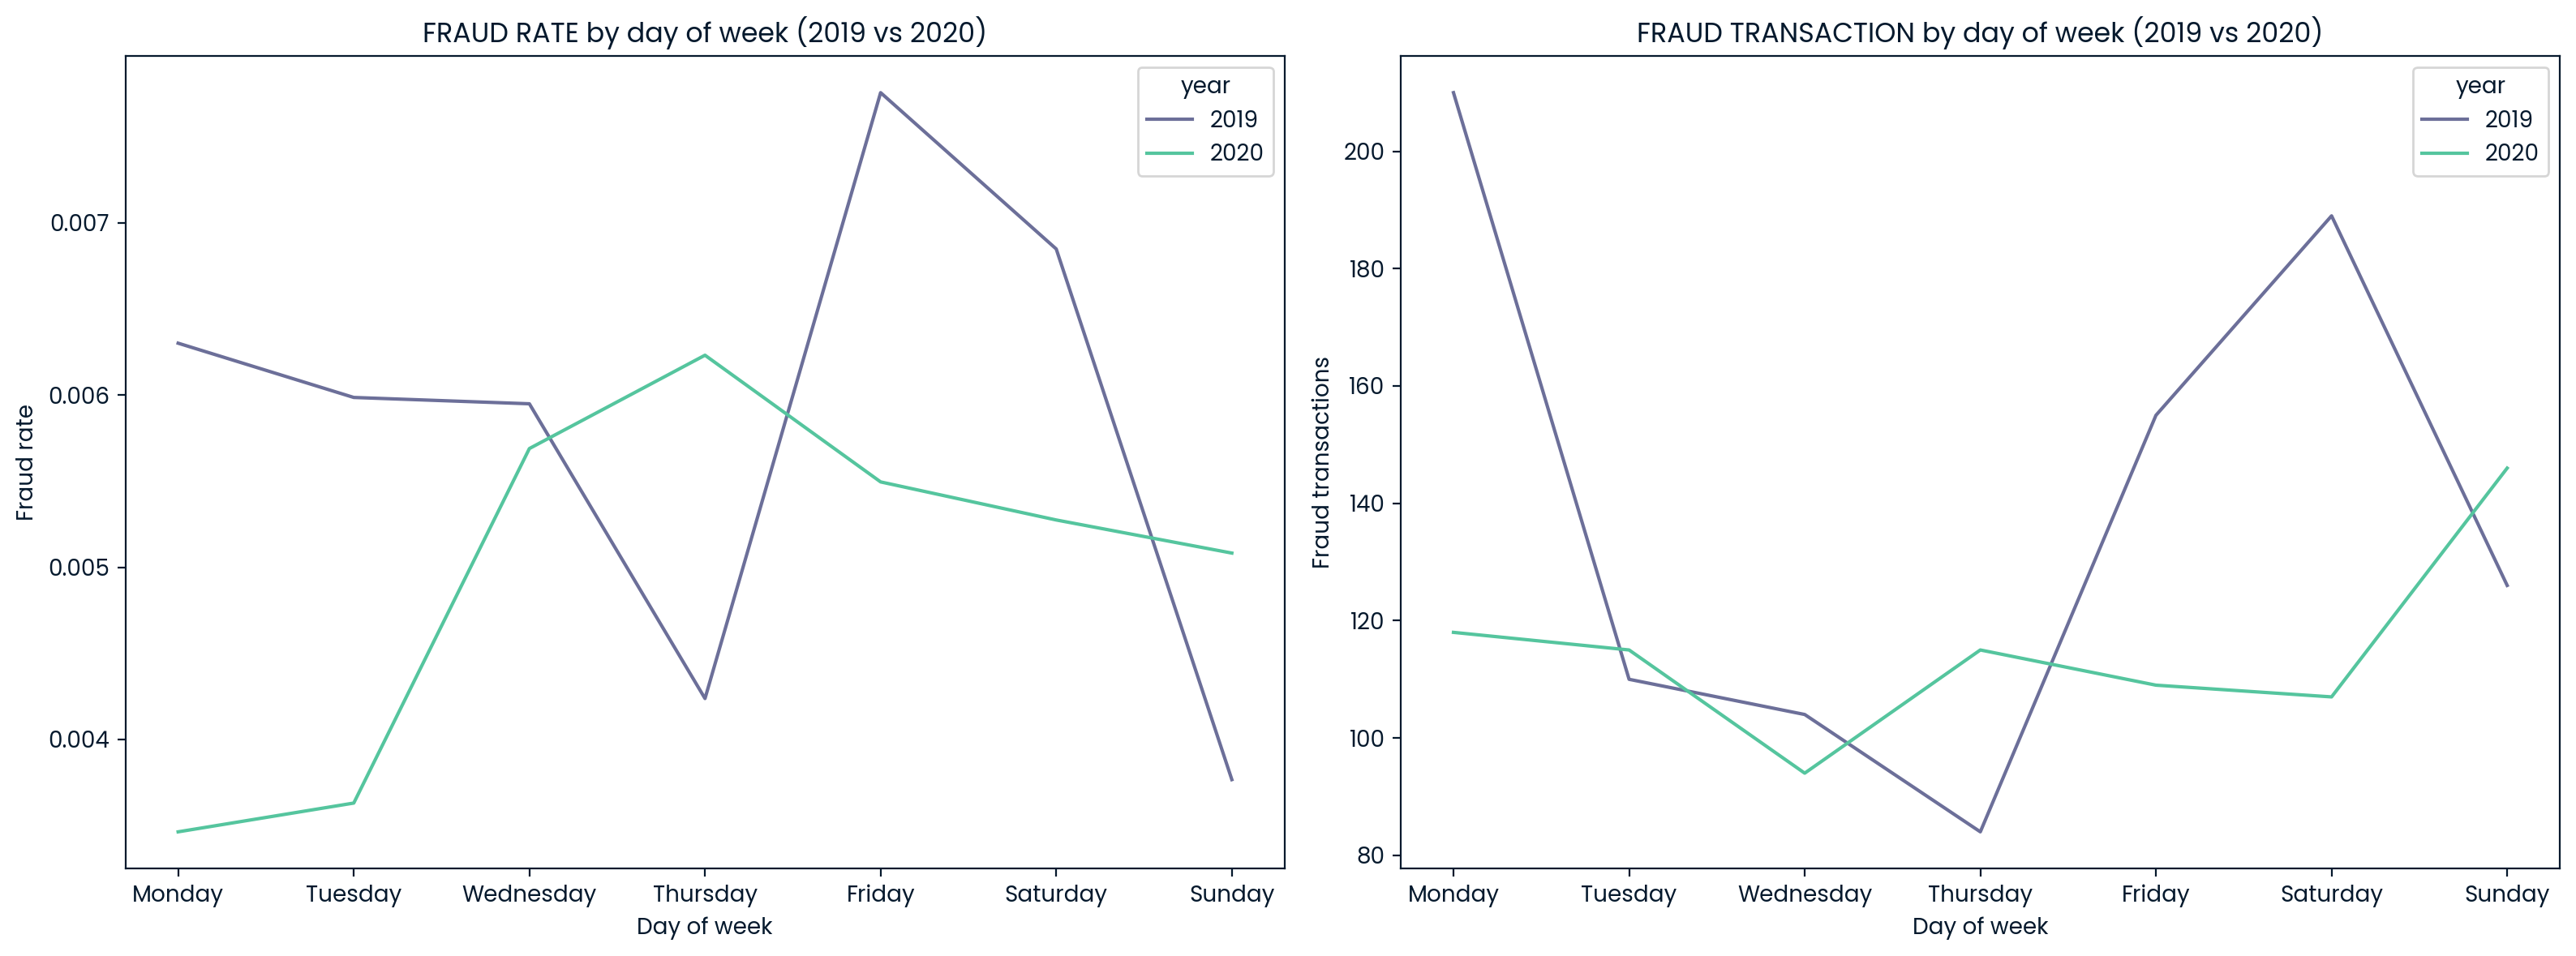

In [ ]:
# Determine the order of the days of the week from Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the column into a categorical column with the specified order
fraud_by_dayweek['day_of_week'] = pd.Categorical(fraud_by_dayweek['day_of_week'],
                                                 categories=day_order,
                                                 ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(
    data=fraud_by_dayweek,
    x='day_of_week',
    y='fraud_rate_by_dow',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    },
    ax=axes[0]  # first subplot
)
axes[0].set_title("FRAUD RATE by day of week (2019 vs 2020)")
axes[0].set_xlabel("Day of week")
axes[0].set_ylabel("Fraud rate")

sns.lineplot(
    data=fraud_by_dayweek,
    x='day_of_week',
    y='fraud_transactions',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    },
    ax=axes[1]  # second subplot
)
axes[1].set_title("FRAUD TRANSACTION by day of week (2019 vs 2020)")
axes[1].set_xlabel("Day of week")
axes[1].set_ylabel("Fraud transactions")

plt.tight_layout() 
plt.show()

**Key Insights (by Day of Week)**

2019 shows strong end-of-week risk, with the highest fraud rate on Friday–Saturday and a sharp drop on Sunday.

Fraud volume in 2019 peaks on Monday and Saturday, indicating concentrated fraud activity at the start and end of the week.

2020 displays a more balanced pattern, with a mid-week peak in fraud rate (Wednesday–Thursday) and fewer extreme fluctuations.

Fraud transactions in 2020 are more evenly distributed, with a noticeable increase on Sunday.

Overall, this suggests a shift from highly concentrated, timing-dependent fraud in 2019 to more distributed and predictable fraud behavior in 2020.

Day-level fraud dynamics differ significantly by year, reinforcing the need for adaptive weekday-based anti-fraud rule

<br>

**UA:**
Ключові висновки (за днями тижня)

2019 рік демонструє високий ризик шахрайства наприкінці тижня, з найвищим рівнем шахрайства у п'ятницю-суботу та різким падінням у неділю.

Обсяг шахрайства у 2019 році досягає піку в понеділок та суботу, що свідчить про концентровану шахрайську активність на початку та в кінці тижня.

2020 рік демонструє більш збалансовану тенденцію з піком рівня шахрайства в середині тижня (середа-четвер) та меншою кількістю екстремальних коливань.

Шахрайські операції у 2020 році розподілені більш рівномірно, з помітним збільшенням у неділю.

Загалом, це свідчить про перехід від висококонцентрованого, залежного від часу шахрайства у 2019 році до більш розподіленої та передбачуваної шахрайської поведінки у 2020 році.

Динаміка шахрайства на рівні дня значно відрізняється за роком, що підкреслює необхідність адаптивного правила боротьби з шахрайством на основі будніх днів.

## Fraud rate by hour 

In [ ]:
-- by hour
SELECT
	EXTRACT(year from trans_date_trans_time) as year
	, EXTRACT(hour from trans_date_trans_time) as hour
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_hour
FROM 'credit_card_fraud.csv'
GROUP BY year, hour
ORDER BY year, fraud_rate_by_hour DESC;

year  hour  total_transactions  fraud_transactions  fraud_rate_by_hour
0   2019    22                8813               252.0            0.028594
1   2019    23                8731               248.0            0.028405
2   2019     1                5754               104.0            0.018074
3   2019     0                5502                90.0            0.016358
4   2019     2                5486                75.0            0.013671
5   2019     3                5698                74.0            0.012987
6   2019    14                8471                13.0            0.001535
7   2019    21                8460                12.0            0.001418
8   2019    17                8626                12.0            0.001391
9   2019    16                8736                12.0            0.001374
10  2019     5                5454                 7.0            0.001283
11  2019     8                5618                 7.0            0.001246
12  2019    12                8464                10.0            0.001181
13  2019    15                8500                10.0            0.001176
14  2019    20                8624                10.0            0.001160
15  2019     9                5456                 6.0            0.001100
16  2019    18                8600                 9.0            0.001047
17  2019     7                5472                 5.0            0.000914
18  2019    13                8537                 7.0            0.000820
19  2019    10                5548                 4.0            0.000721
20  2019    19                8856                 5.0            0.000565
21  2019     6                5658                 3.0            0.000530
22  2019     4                5445                 2.0            0.000367
23  2019    11                5530                 1.0            0.000181
24  2020    23                8785               211.0            0.024018
25  2020    22                8647               200.0            0.023129
26  2020     0                5537                78.0            0.014087
27  2020     3                5529                69.0            0.012480
28  2020     2                5533                65.0            0.011748
29  2020     1                5487                64.0            0.011664
30  2020    20                8674                13.0            0.001499
31  2020    15                8669                12.0            0.001384
32  2020    16                8729                11.0            0.001260
33  2020    10                5575                 6.0            0.001076
34  2020    18                8421                 9.0            0.001069
35  2020    17                8385                 8.0            0.000954
36  2020     4                5459                 5.0            0.000916
37  2020    11                5486                 5.0            0.000911
38  2020     8                5505                 5.0            0.000908
39  2020     9                5541                 5.0            0.000902
40  2020    13                8588                 7.0            0.000815
41  2020    12                8704                 7.0            0.000804
42  2020     6                5487                 4.0            0.000729
43  2020    19                8421                 6.0            0.000713
44  2020     7                5622                 4.0            0.000711
45  2020    21                8807                 5.0            0.000568
46  2020     5                5569                 3.0            0.000539
47  2020    14                8408                 2.0            0.000238

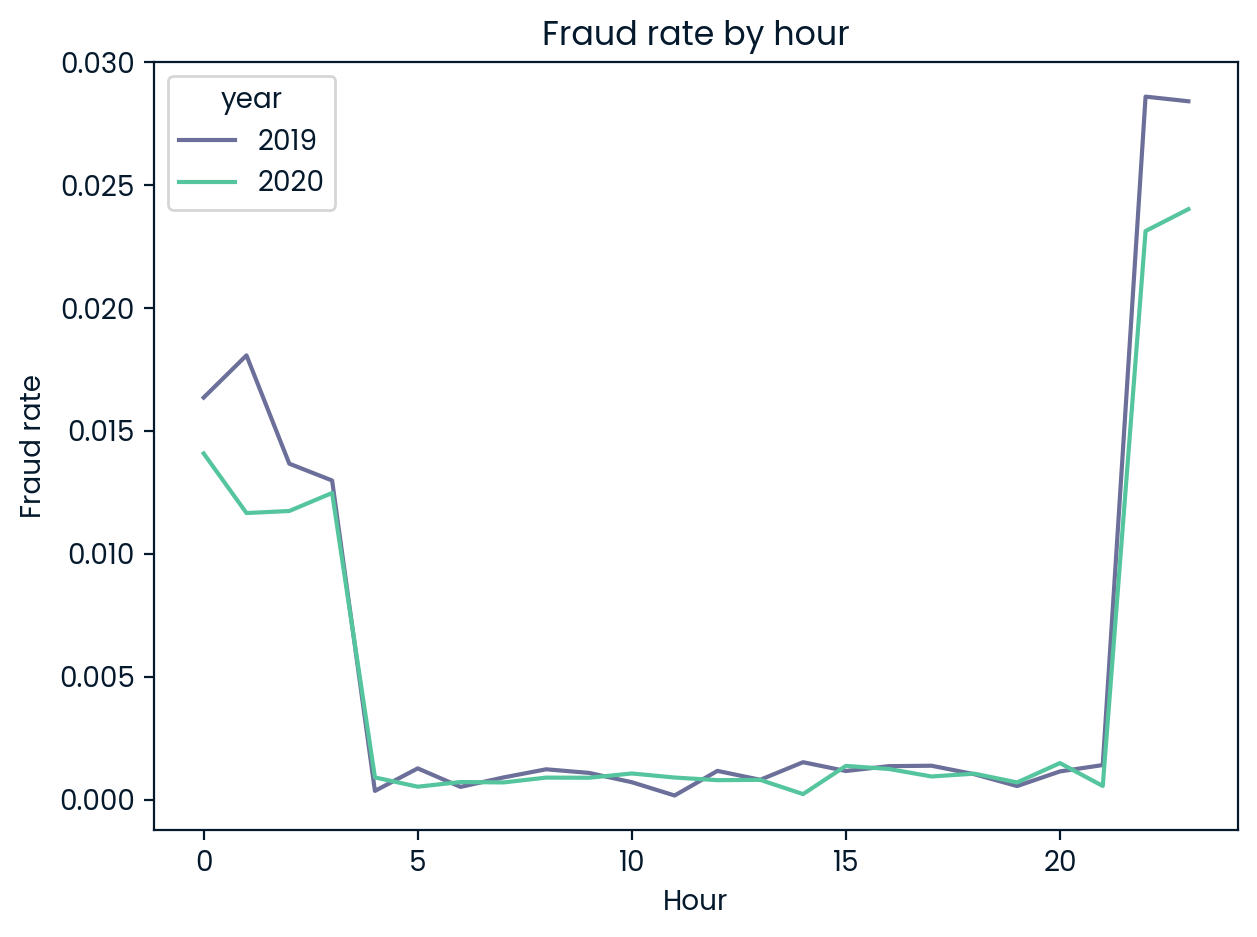

In [ ]:
sns.lineplot(
    data=fraud_hour,
    x='hour',
    y='fraud_rate_by_hour',
    hue='year',
    palette={
        2019: '#6C6F99',  # violet
        2020: '#55C59E'   # green
    }
)
plt.title("Fraud rate by hour")
plt.xlabel("Hour")
plt.ylabel("Fraud rate")

plt.tight_layout() 
plt.show()

## Look at the distribution of transactions by day of the week and hour

In [ ]:
--Fraud rate by day_of_week and hour 2019

SELECT
	EXTRACT(hour from trans_date_trans_time) as hour
	, dayname(trans_date_trans_time) AS day_of_week
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_hour
	, ROUND(AVG(CASE WHEN is_fraud = 1 THEN amt END)) AS avg_fraud_amount
	, ROUND(percentile_cont(0.5) WITHIN GROUP (ORDER BY CASE WHEN is_fraud = 1 THEN amt END)) AS median_fraud_amount
FROM 'credit_card_fraud.csv'
WHERE EXTRACT(year from trans_date_trans_time) = 2019
GROUP BY  hour, day_of_week
ORDER BY hour, fraud_rate_by_hour DESC;

hour day_of_week  ...  avg_fraud_amount  median_fraud_amount
0       0      Monday  ...             273.0                298.0
1       0   Wednesday  ...             519.0                352.0
2       0      Friday  ...             289.0                306.0
3       0    Thursday  ...             445.0                336.0
4       0    Saturday  ...             373.0                319.0
..    ...         ...  ...               ...                  ...
163    23    Saturday  ...             655.0                744.0
164    23   Wednesday  ...             573.0                729.0
165    23     Tuesday  ...             628.0                734.0
166    23    Thursday  ...             520.0                474.0
167    23      Sunday  ...             671.0                790.0

[168 rows x 7 columns]

In [ ]:
--Fraud rate by day_of_week and hour 2020

SELECT
	EXTRACT(hour from trans_date_trans_time) as hour
	, dayname(trans_date_trans_time) AS day_of_week
	, COUNT(*) AS total_transactions --the total number of transactions;
	, SUM(is_fraud) AS fraud_transactions 
    , SUM(is_fraud)*1.0/COUNT(*) AS fraud_rate_by_hour
	, ROUND(AVG(CASE WHEN is_fraud = 1 THEN amt END)) AS avg_fraud_amount
	, ROUND(percentile_cont(0.5) WITHIN GROUP (ORDER BY CASE WHEN is_fraud = 1 THEN amt END)) AS median_fraud_amount
FROM 'credit_card_fraud.csv'
WHERE EXTRACT(year from trans_date_trans_time) = 2020
GROUP BY  hour, day_of_week
ORDER BY hour, fraud_rate_by_hour DESC;

hour day_of_week  ...  avg_fraud_amount  median_fraud_amount
0       0    Thursday  ...             349.0                299.0
1       0   Wednesday  ...             237.0                152.0
2       0    Saturday  ...             444.0                328.0
3       0      Sunday  ...             321.0                298.0
4       0     Tuesday  ...             430.0                348.0
..    ...         ...  ...               ...                  ...
163    23      Sunday  ...             633.0                831.0
164    23    Thursday  ...             737.0                881.0
165    23   Wednesday  ...             658.0                802.0
166    23     Tuesday  ...             603.0                831.0
167    23      Monday  ...             676.0                818.0

[168 rows x 7 columns]

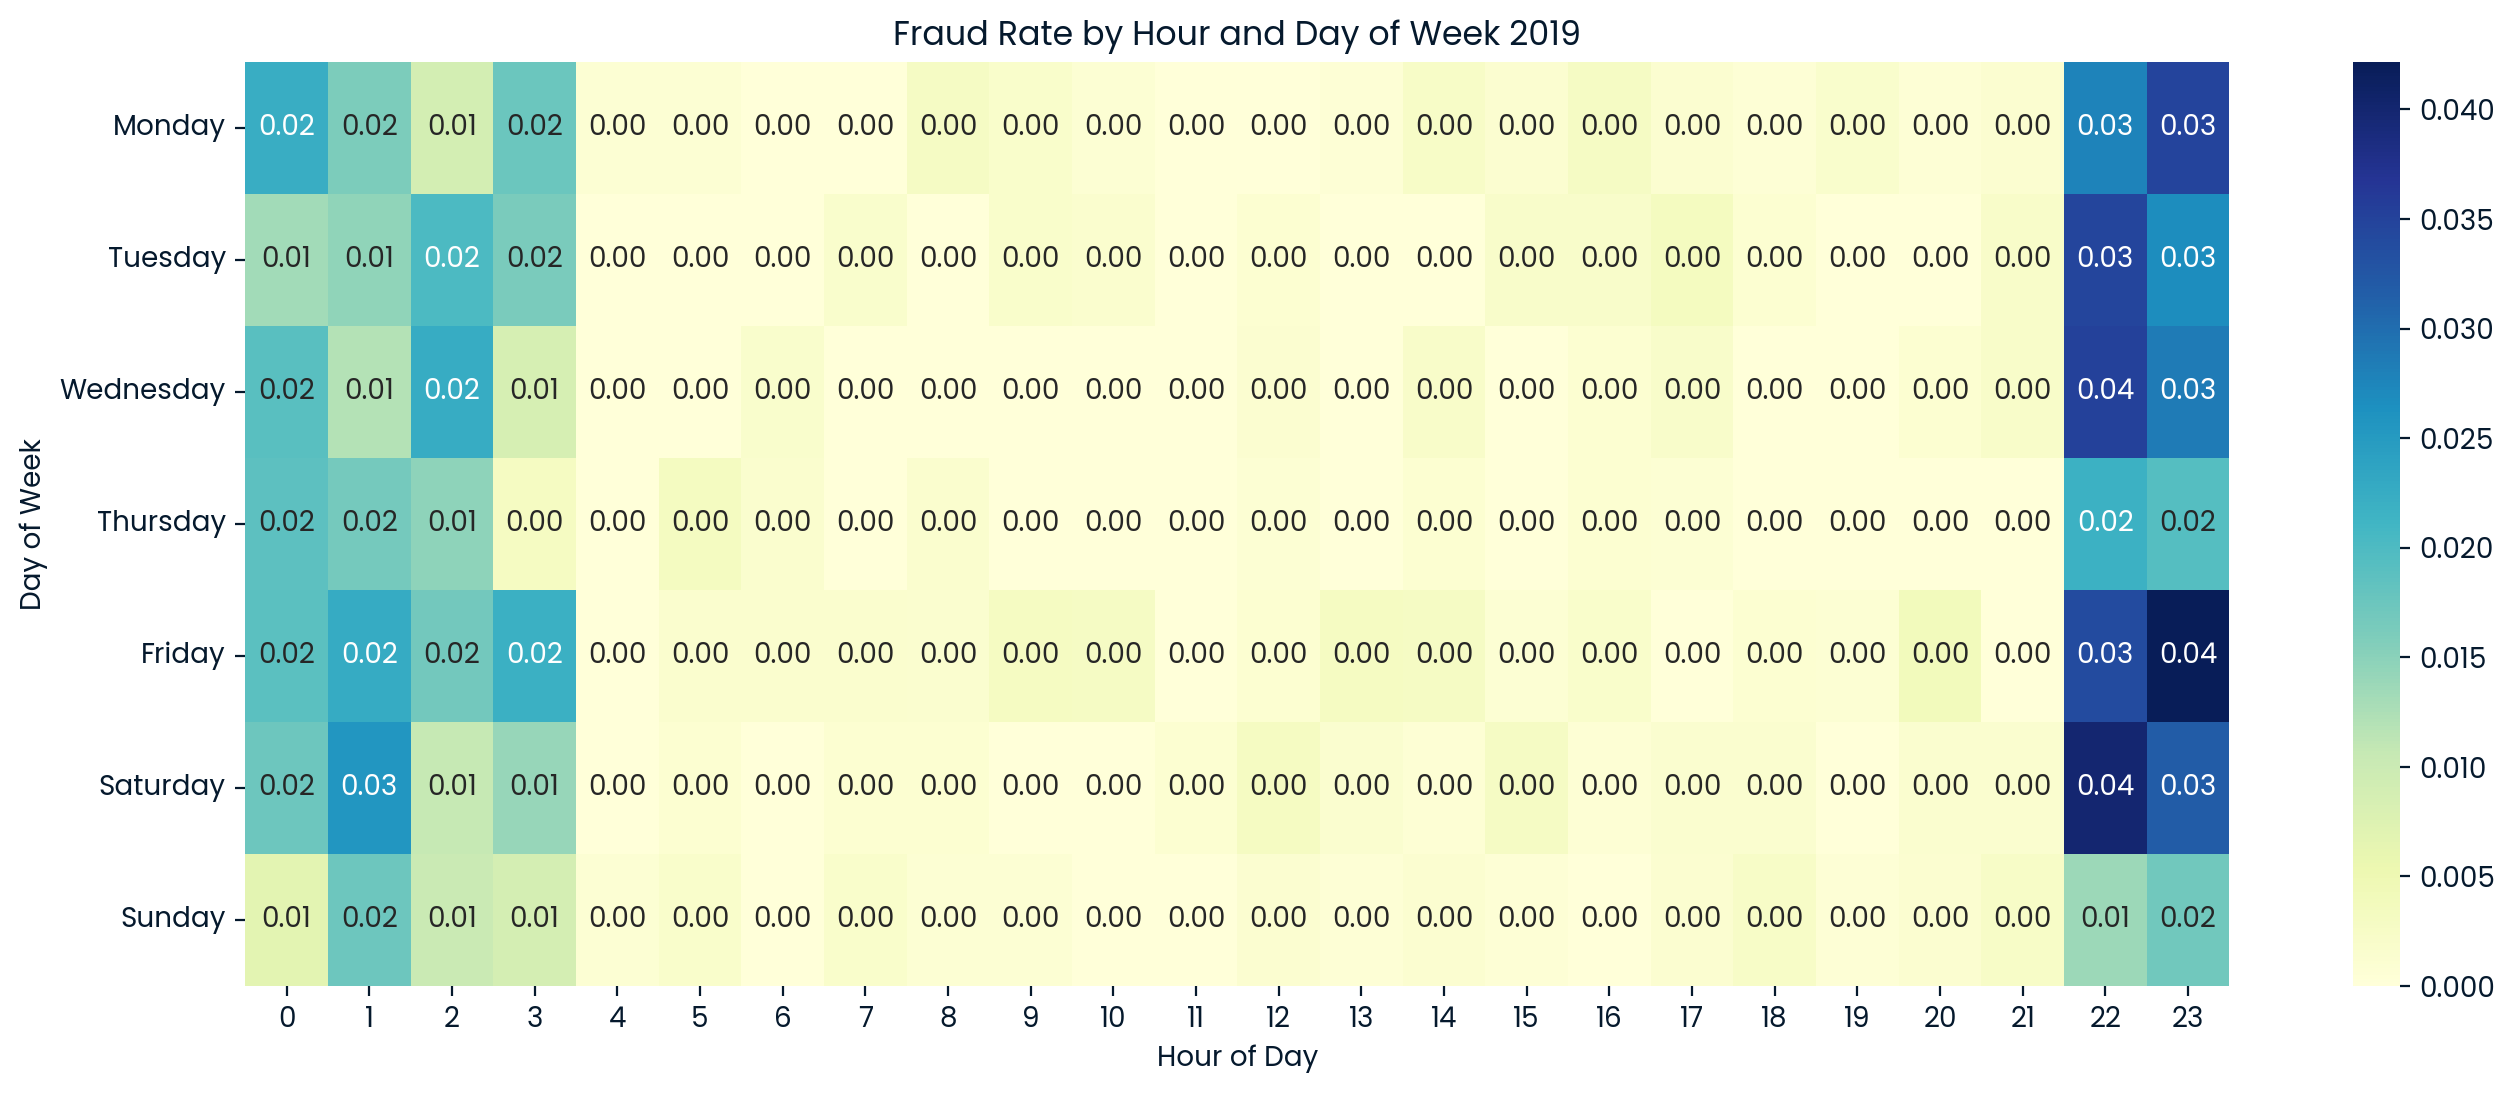

In [ ]:
# 1️⃣ Pivot table: day_of_week — rows, hour — columns
heatmap_data = hour_dayweek_2019.pivot(index='day_of_week', columns='hour', values='fraud_rate_by_hour')

# 2️⃣ Sort days of week: Mon, Tue, ..., Sun
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# 3️⃣ heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",  # color palette
    annot=True,     # displays values ​​in cells
    fmt=".2f"       # number format
)
plt.title("Fraud Rate by Hour and Day of Week 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


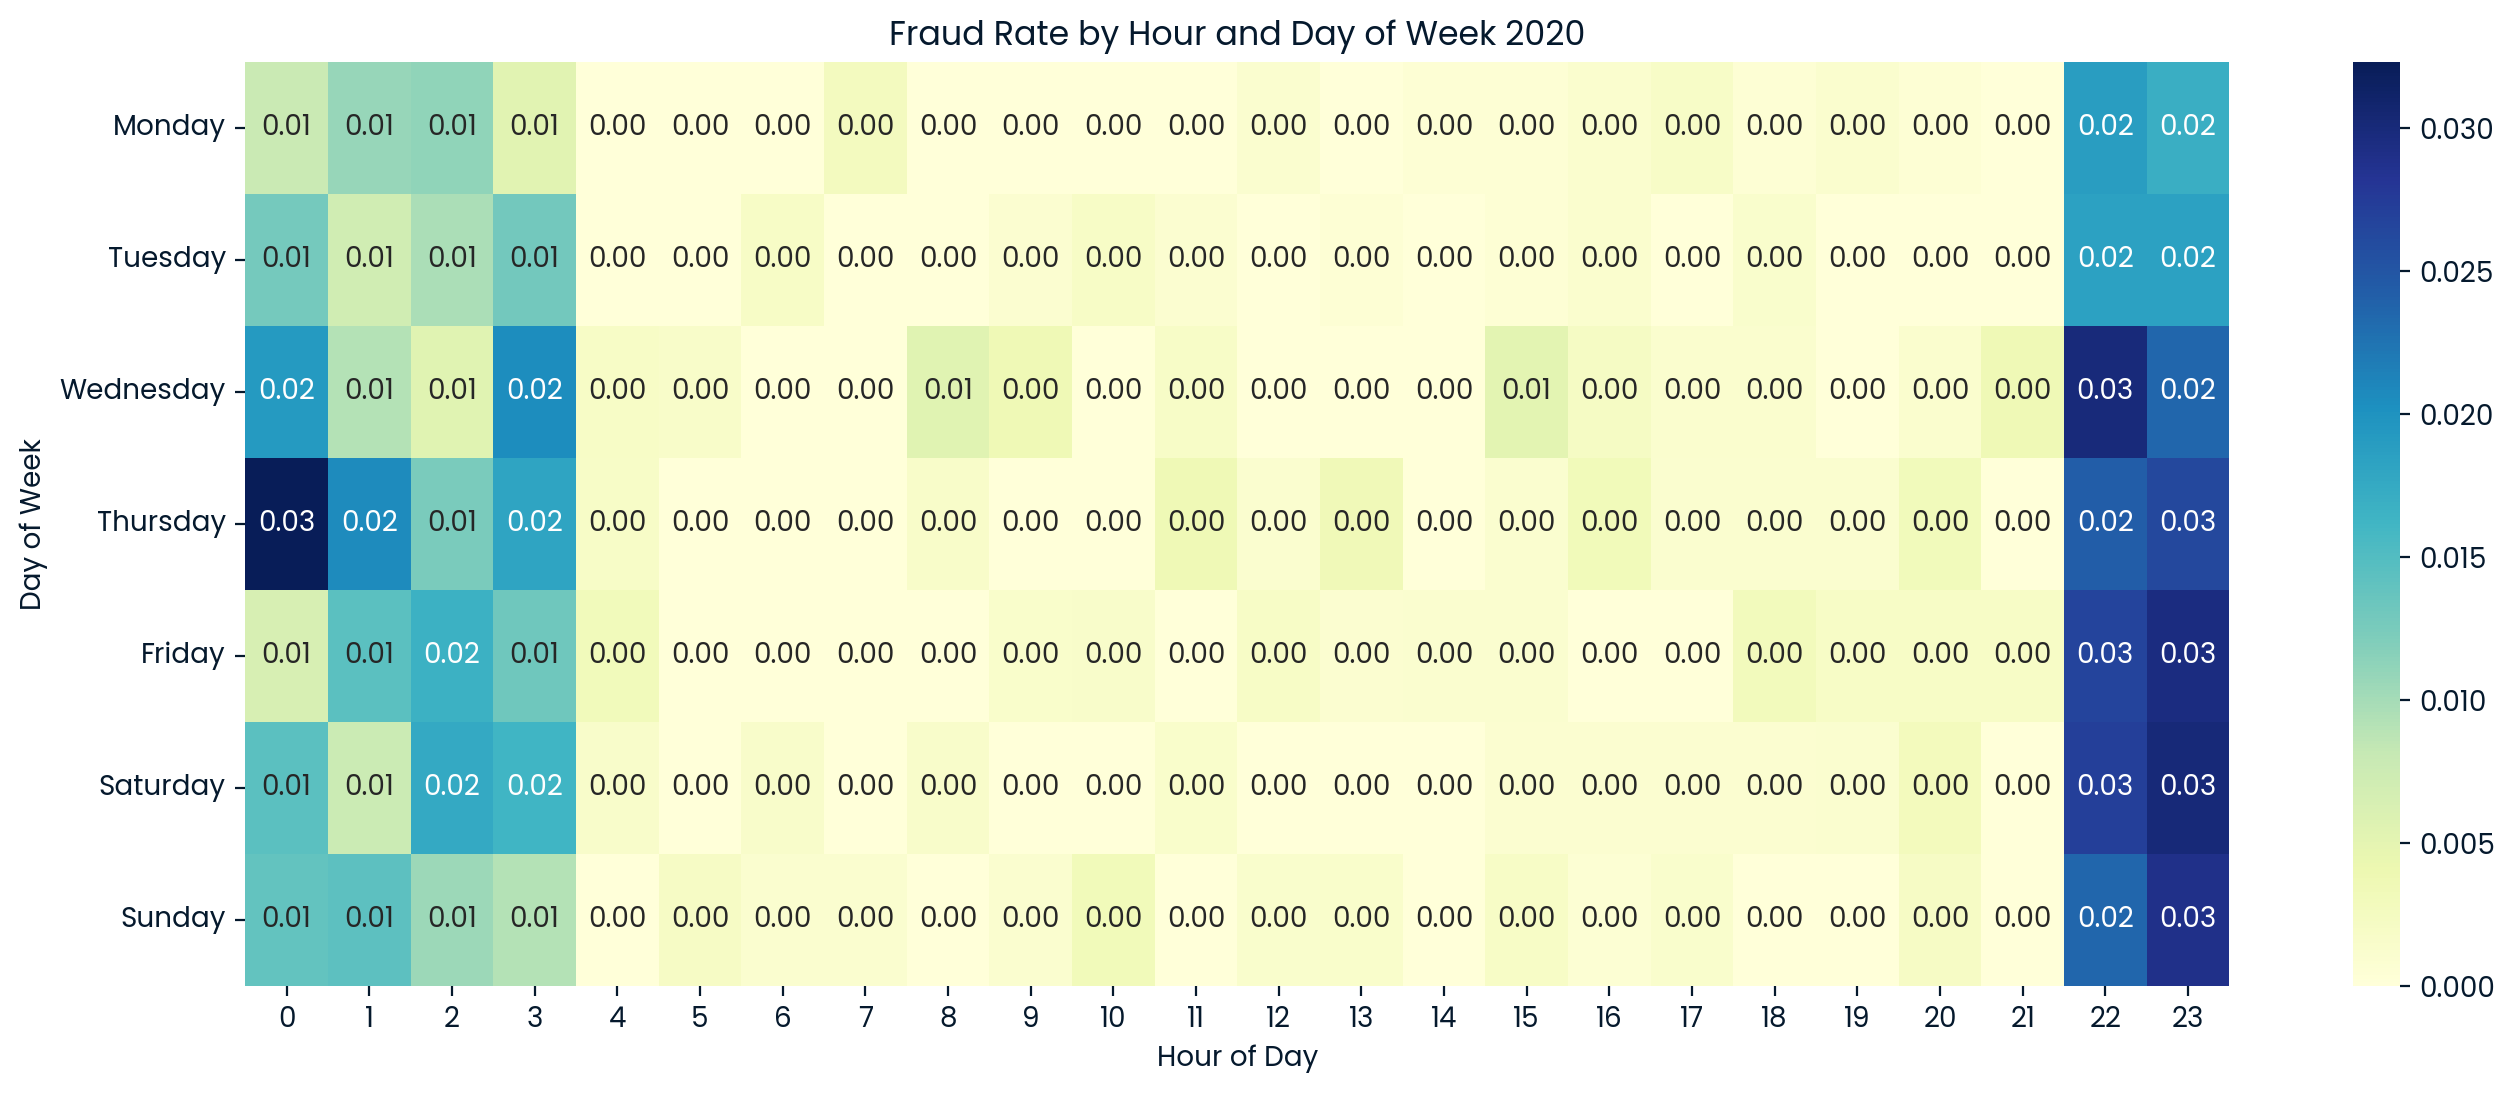

In [ ]:
# 1️⃣ Pivot table: day_of_week — rows, hour — columns
heatmap_data = hour_dayweek_2020.pivot(index='day_of_week', columns='hour', values='fraud_rate_by_hour')

# 2️⃣ Sort days of week: Mon, Tue, ..., Sun
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# 3️⃣ heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",  # color palette
    annot=True,     # displays values ​​in cells
    fmt=".2f"       # number format
)
plt.title("Fraud Rate by Hour and Day of Week 2020")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

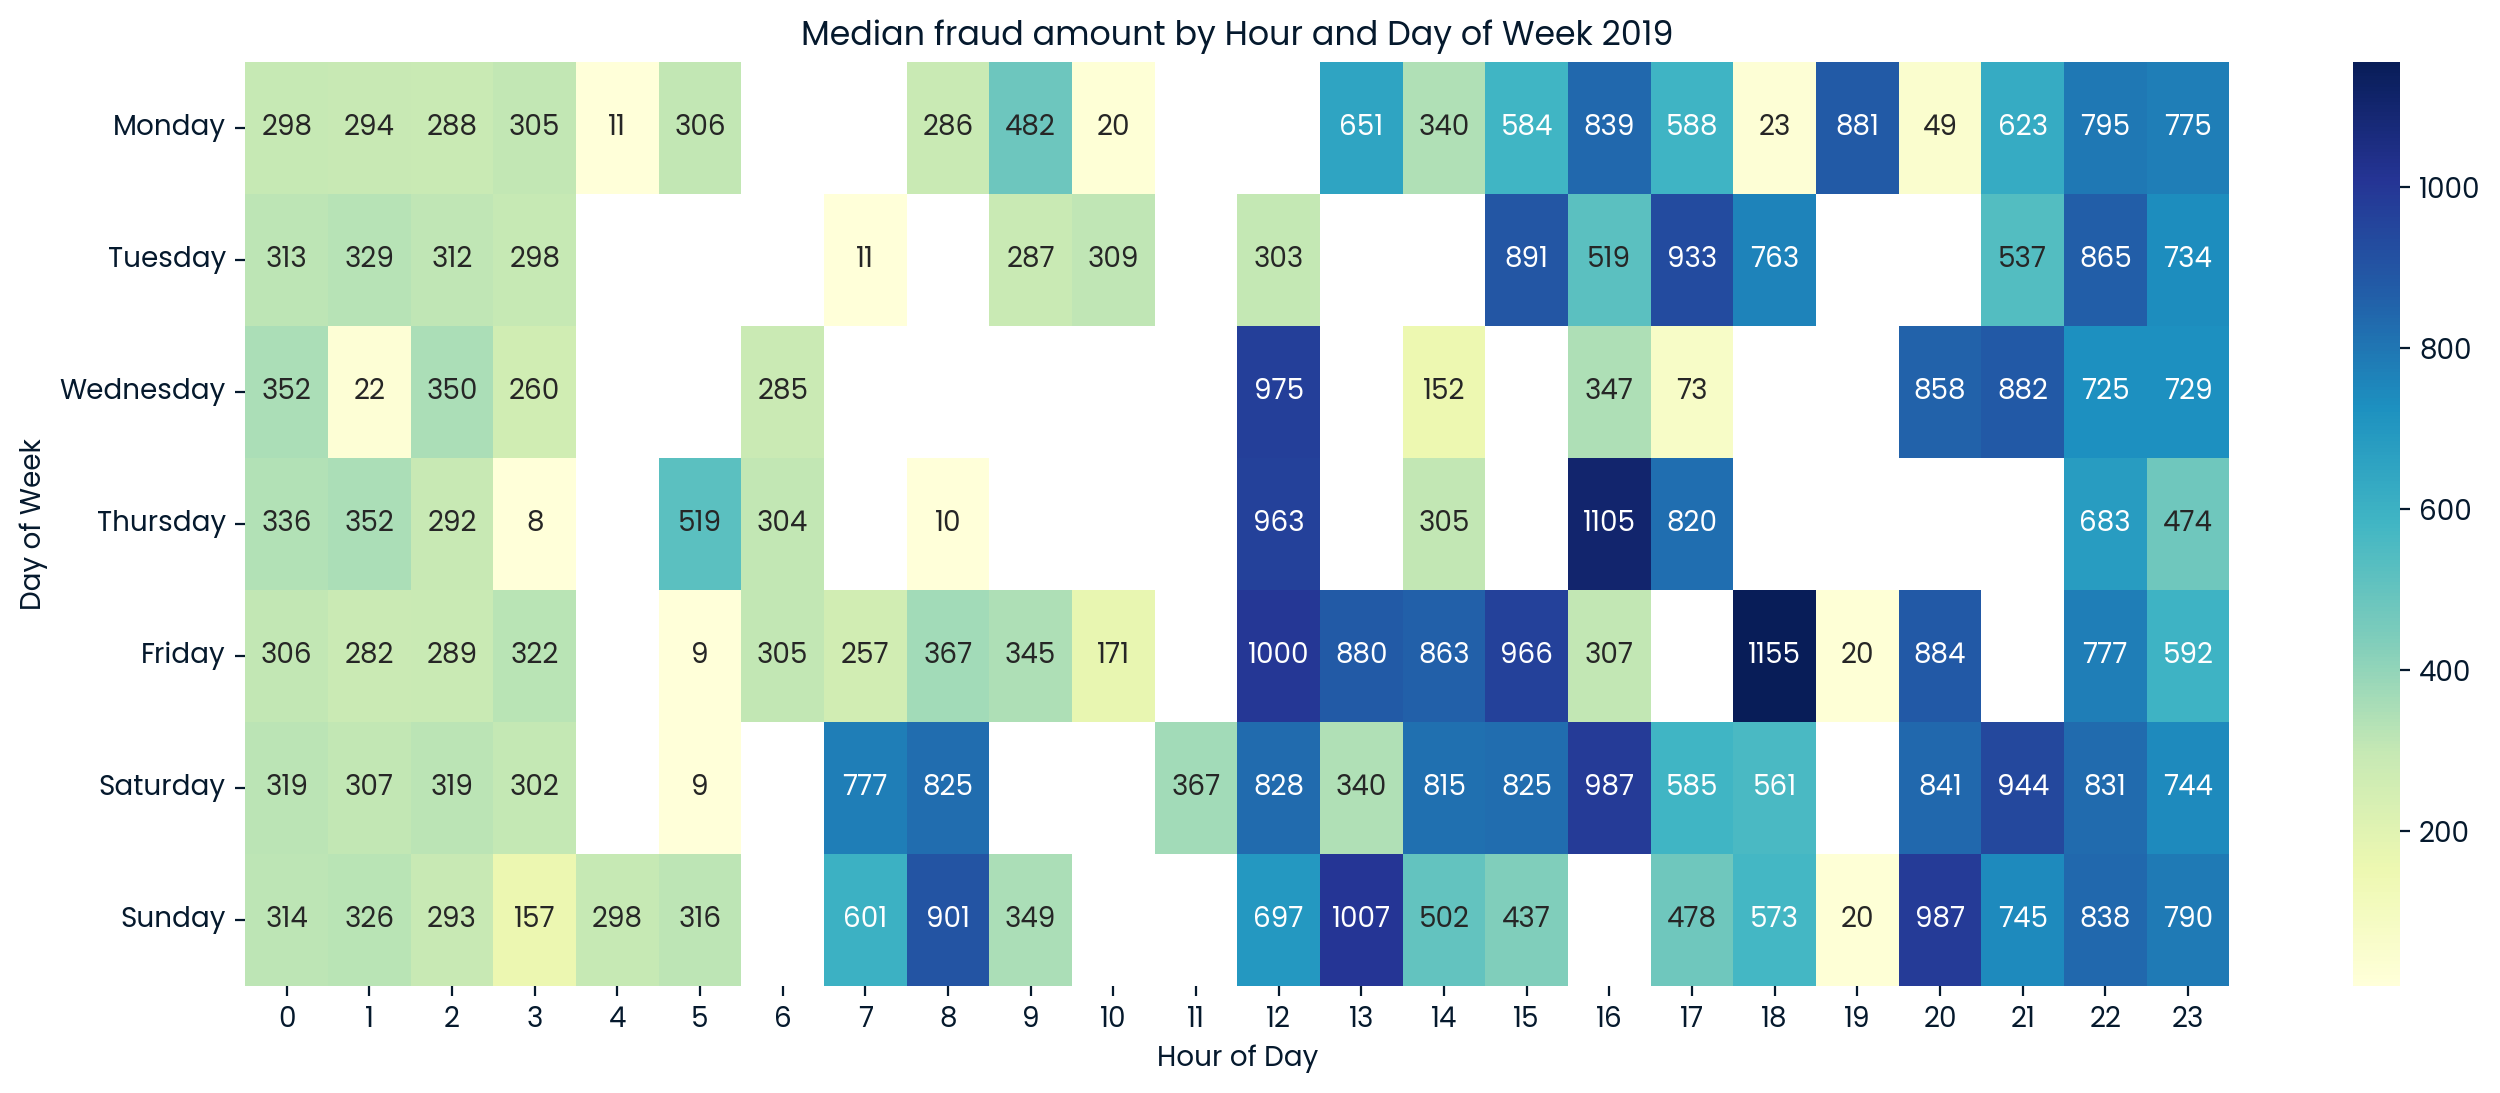

In [ ]:
# 1️⃣ Pivot table: day_of_week - rows, hoar -columns
heatmap_data = hour_dayweek_2019.pivot(index='day_of_week', columns='hour', values='median_fraud_amount')

# 2️⃣ Sort days of week: Mon, Tue, ..., Sun
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# 3️⃣ heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",  # color palette
    annot=True,     # displays values ​​in cells
    fmt=".0f"       # number format
)
plt.title("Median fraud amount by Hour and Day of Week 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

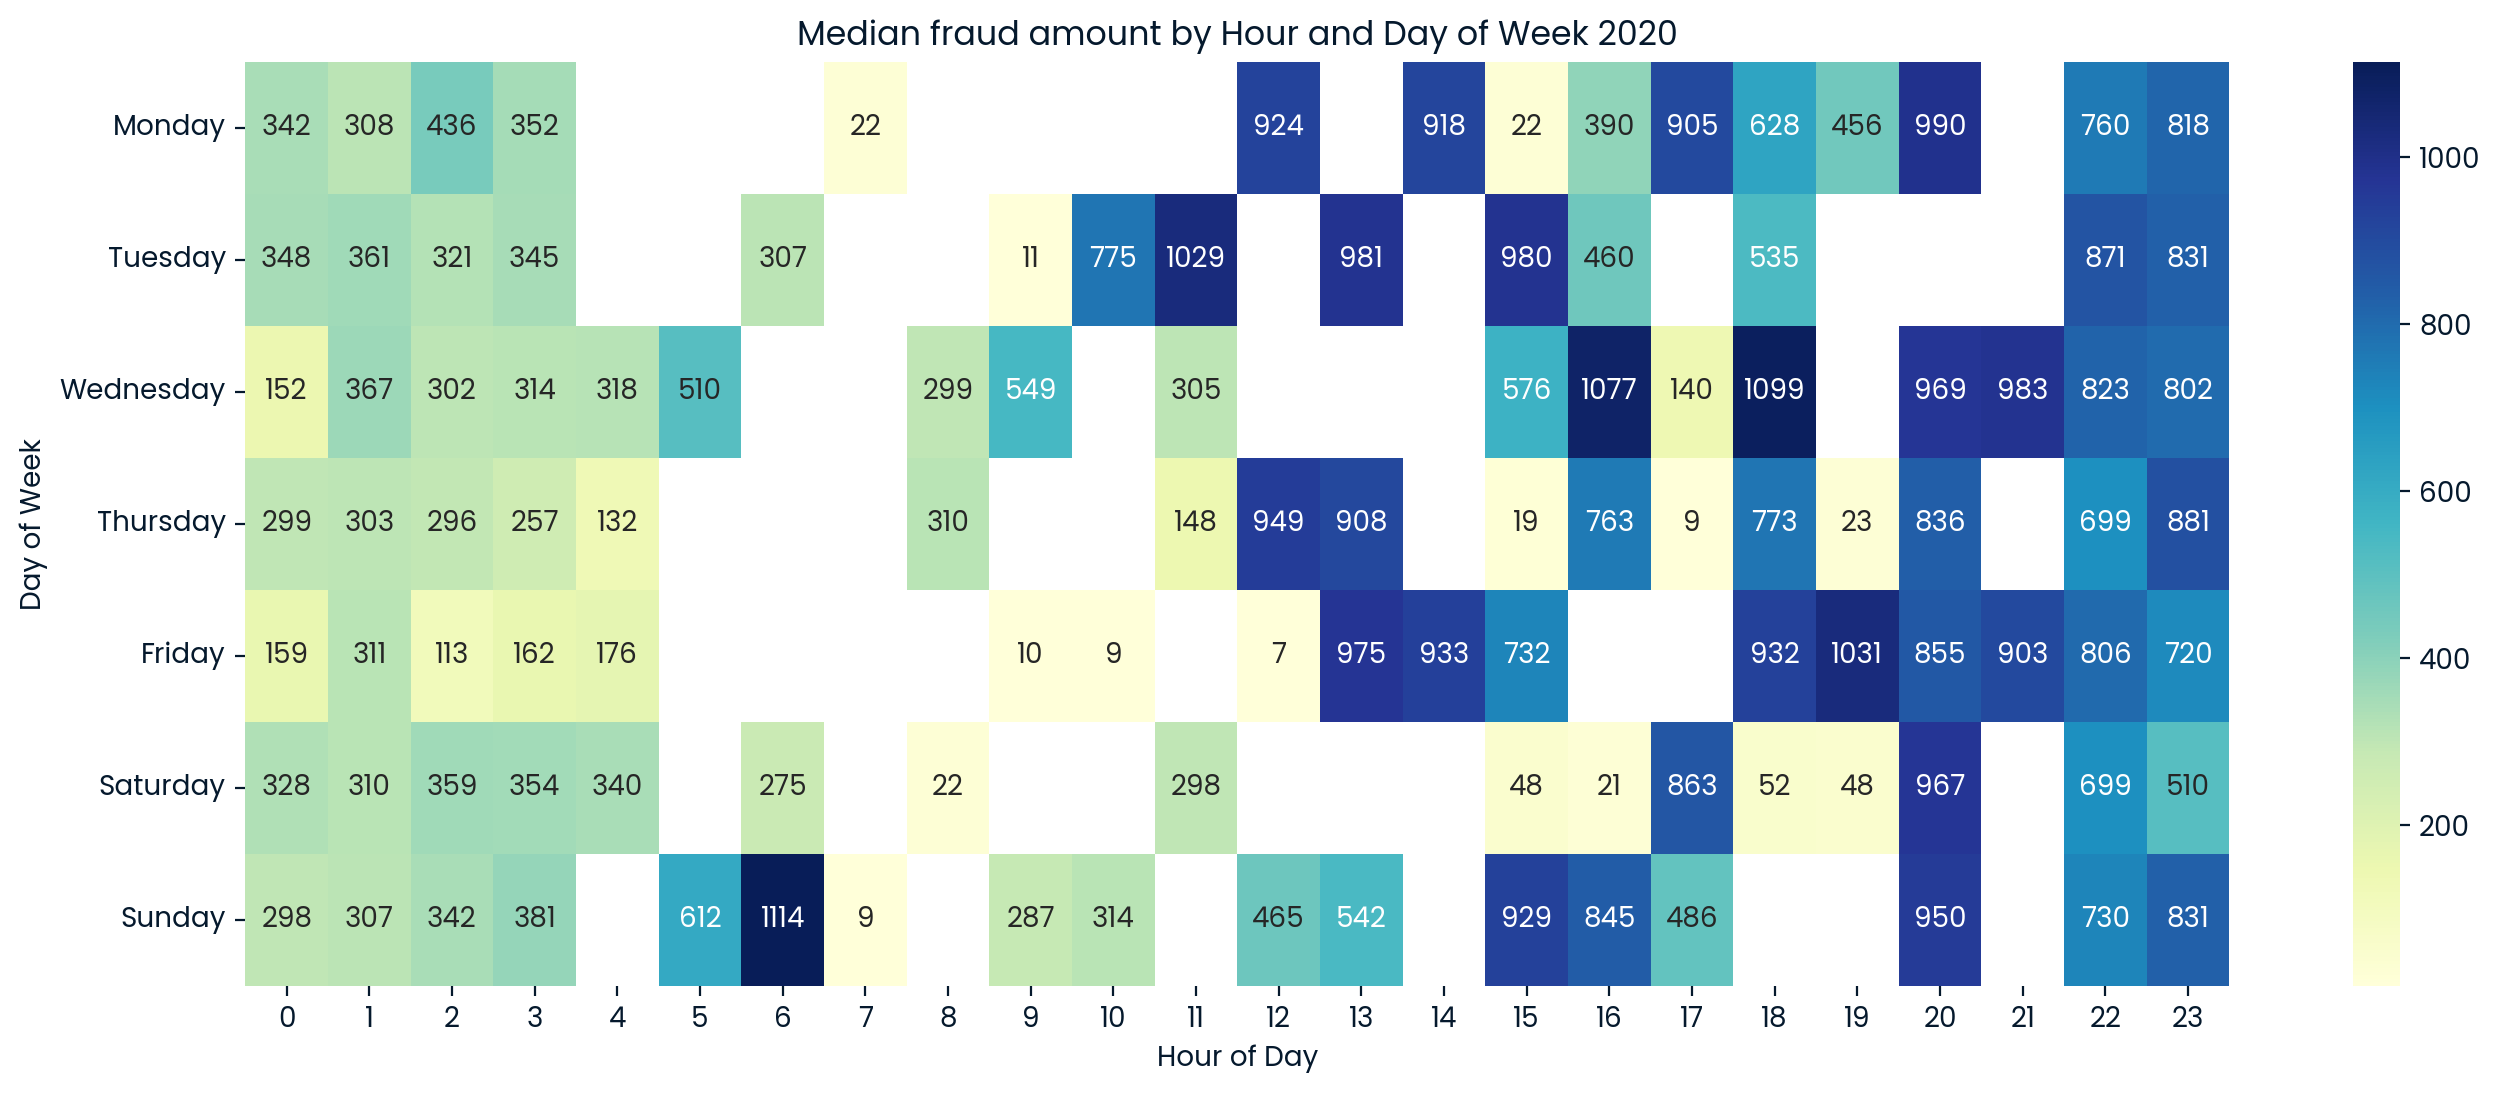

In [ ]:
# 1️⃣ Pivot table: day_of_week - rows, hoar -columns
heatmap_data = hour_dayweek_2020.pivot(index='day_of_week', columns='hour', values='median_fraud_amount')

# 2️⃣ Sort days of week: Mon, Tue, ..., Sun
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# 3️⃣ heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",  # color palette
    annot=True,     # displays values ​​in cells
    fmt=".0f"       # number format
)
plt.title("Median fraud amount by Hour and Day of Week 2020")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

The heatmaps reveal a strong nighttime fraud pattern.
Fraudulent transactions not only occur more frequently during late evening and night hours (especially between 22:00 and 23:00), but they are also associated with significantly higher transaction amounts.

This indicates increased financial risk during low-monitoring periods, suggesting that transaction amount combined with time-of-day features can be valuable predictors in fraud detection systems.

<br>

**UA:**
Теплові карти виявляють сильну тенденцію до шахрайства в нічний час. Шахрайські транзакції не лише частіше відбуваються пізно ввечері та вночі (особливо між 22:00 та 23:00), але й пов'язані зі значно вищими сумами транзакцій.

Це вказує на підвищений фінансовий ризик у періоди низького моніторингу, що свідчить про те, що сума транзакції в поєднанні з характеристиками часу доби може бути цінними предикторами в системах виявлення шахрайства.